#SGDClassifier

In [1]:
import pandas as pd
fish = pd.read_csv("https://bit.ly/fish_csv_data")

In [2]:
fish_input = fish[["Weight", "Length", "Diagonal","Height","Width"]].to_numpy()
fish_target = fish["Species"].to_numpy()

In [4]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [6]:
# input 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [7]:
from sklearn.linear_model import SGDClassifier

In [8]:
# SGDClassifier 클래스 : 확률적 경사 하강법
# loss 매개변수 : 손실 함수의 종류를 지정 (log는 로지스틱 손실 함수)
# max_iter 매개변수 : 수행할 에포크 횟수 지정
sc = SGDClassifier(loss="log", max_iter=10, random_state=42)
sc.fit(train_scaled, train_target) # train 데이터로 모델 학습
print(sc.score(train_scaled, train_target)) #학습한 모델의 정확도 확인
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [9]:
# 에포크 횟수가 10은 너무 작은듯함 -> 훈련을 더시켜서 정확도를 올릴 계획
# partial_fit() 메서드 : 훈련한 모델을 추가로 이어서 훈련함
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [10]:
# 한번더
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7815126050420168
0.8


In [11]:
# 한번더 훈련시키고 난 후 오히려 정확도가 떨어짐
# 조기종료 : 과대적합이 시작하기 전에 훈련을 멈추는 것
import numpy as np
sc = SGDClassifier(loss="log", random_state=42)
train_score=[]
test_score=[]
classes= np.unique(train_target)
for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

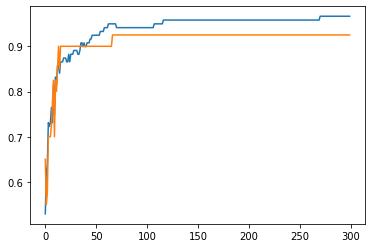

In [12]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [13]:
# 대략 반복 횟수가 100이후로는 훈련세트와 테스트 세트의 점수의 격차가 벌어지는 듯함
sc = SGDClassifier(loss="log", max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [14]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [15]:
# 힌지 손실
sc = SGDClassifier(loss="hinge", max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
